### Imports

In [7]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Read in Emissions and Climate Output Data

In [8]:
# read in emission CSVs as exogenous input to the GHG concentration equations
E_CO2_vector = pd.read_csv("co2_emissions_glob.csv")
E_NO2_vector = pd.read_csv("n2o_emissions_glob.csv")
E_CH4_vector = pd.read_csv("ch4_emissions_glob.csv")
E_SF6_vector = pd.read_csv("sf6_emissions_glob.csv")

E_CO2_vector.fillna(0, inplace=True)
E_NO2_vector.fillna(0, inplace=True)
E_CH4_vector.fillna(0, inplace=True)
E_SF6_vector.fillna(0, inplace=True)

# read in climate output data for validation purposes
AC_CO2_vector = pd.read_csv("co2_atmo_conc.csv")
AC_CO2_box_vector = pd.read_csv("co2_box_atmo_conc.csv")
AC_CH4_vector = pd.read_csv("ch4_atmo_conc.csv")
AC_N2O_vector = pd.read_csv("n2o_atmo_conc.csv")
AC_SF6_vector = pd.read_csv("sf6_atmo_conc.csv")

AC_CO2_vector.fillna(0, inplace=True)
AC_CO2_box_vector.fillna(0, inplace=True)
AC_CH4_vector.fillna(0, inplace=True)
AC_N2O_vector.fillna(0, inplace=True)
AC_SF6_vector.fillna(0, inplace=True)

AC_CO2_box1_vector = AC_CO2_box_vector.loc[AC_CO2_box_vector['5'] == 1]
AC_CO2_box2_vector = AC_CO2_box_vector.loc[AC_CO2_box_vector['5'] == 2]
AC_CO2_box3_vector = AC_CO2_box_vector.loc[AC_CO2_box_vector['5'] == 3]
AC_CO2_box4_vector = AC_CO2_box_vector.loc[AC_CO2_box_vector['5'] == 4]
AC_CO2_box5_vector = AC_CO2_box_vector.loc[AC_CO2_box_vector['5'] == 5]


### Functions

In [9]:

def E_CO2(t):
    # print('time: ', int(t))
    return E_CO2_vector.iloc[int(t),1]
def E_NO2(t):
    return E_NO2_vector.iloc[int(t),1]
def E_CH4(t):
    return E_CH4_vector.iloc[int(t),1]
def E_SF6(t):
    return E_SF6_vector.iloc[int(t),1]

def conc_CO2(y, t):
    # print('time: ', t)
    Box_1, Box_2, Box_3, Box_4, Box_5 = y 
    alpha_i = [0.13, 0.20, 0.32, 0.25, 0.10]
    rho_i = [np.exp(0), np.exp(-1/363), np.exp(-1/74), np.exp(-1/17), np.exp(-1/2)]

    dBox1dt = (rho_i[0]-1)*Box_1 + 0.000471*alpha_i[0]*E_CO2(t)
    dBox2dt = (rho_i[1]-1)*Box_2 + 0.000471*alpha_i[1]*E_CO2(t)
    dBox3dt = (rho_i[2]-1)*Box_3 + 0.000471*alpha_i[2]*E_CO2(t)
    dBox4dt = (rho_i[3]-1)*Box_4 + 0.000471*alpha_i[3]*E_CO2(t)
    dBox5dt = (rho_i[4]-1)*Box_5 + 0.000471*alpha_i[4]*E_CO2(t)
    # print("dBox1dt", dBox1dt)
    # print("dBox2dt", dBox2dt)
    # print("dBox3dt", dBox3dt)
    # print("dBox4dt", dBox4dt)
    # print("dBox5dt", dBox5dt)

    # dCdt = alpha_i[0]*Box_1 + alpha_i[1]*Box_2  + alpha_i[2]*Box_3  +alpha_i[3]*Box_4  +alpha_i[4]*Box_5 
    # dCdt = Box_1 + Box_2  + Box_3  + Box_4  + Box_5 

    return dBox1dt, dBox2dt, dBox3dt, dBox4dt, dBox5dt

def conc_NO2(y, t, alpha, beta, C_pre):
    C = y
    # C_pre = 285 #ppb
    dCdt = alpha*E_NO2(t) - beta*(C-C_pre)

    return dCdt

def conc_CH4(y, t, alpha, beta, C_pre):
    C = y
    # C_pre = 790 #ppb
    dCdt = alpha*E_CH4(t) - beta*(C-C_pre)

    return dCdt

def conc_SF6(y, t, alpha, beta, C_pre):
    C = y
    # C_pre = 0.04 #ppt; *1000 to convert to ppb
    dCdt = alpha*E_SF6(t) - beta*(C-C_pre)

    return dCdt

def plotCO2_conc(t, Box1, Box2, Box3, Box4, Box5, CO2_conc, MimiBox1, MimiBox2, MimiBox3, MimiBox4, MimiBox5, MimiCO2_conc):
    f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, null)) = plt.subplots(4,2, sharex = 'col', figsize=(20,20))
    ax1.plot(t, Box1, 'b', alpha=0.7, linewidth=2, label='Box1')
    ax1.plot(t, Box2, 'r', alpha=0.7, linewidth=2, label='Box2')
    ax1.plot(t, Box3, 'g', alpha=0.7, linewidth=2, label='Box3')
    ax1.plot(t, Box4, 'c', alpha=0.7, linewidth=2, label='Box4')
    ax1.plot(t, Box5, 'w', alpha=0.7, linewidth=2, label='Box5')
    ax1.set_xlim([1950, 2200])
    ax1.set_ylim([0, 600])
    ax1.set_xlabel('Time (year)')
    ax1.set_ylabel('Box Concentration')
    ax1.set_title('All CO2 Box AC Trajectories')
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    ax1.grid(which='major', c='w', lw=0.5, ls='--')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
  
    ax2.plot(t, CO2_conc, 'c--', alpha=0.7, linewidth=2, label='Total CO2 Concentration - odeint')
    ax2.plot(t, MimiCO2_conc, 'w--', alpha=0.7, linewidth=2, label='Total CO2 Concentration - MimiFUND')
    ax2.set_xlim([1950, 2200])
    ax2.set_ylim([0, 1200])
    ax2.set_xlabel('Time (year)')
    ax2.set_ylabel('ppm')
    ax2.set_title('CO2 Atmospheric Concentration')
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    ax2.grid(which='major', c='w', lw=0.5, ls='--')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)

    ax3.plot(t, Box1, 'b.', alpha=0.7, linewidth=2, label='Box1 - odeint')
    ax3.plot(t, MimiBox1, 'r.', alpha=0.7, linewidth=2, label='Box1 - MimiFUND')
    ax3.set_xlabel('Time (year)')
    ax3.set_ylabel('Box Concentration')
    ax3.set_title('CO2 Box 1 Atmospheric Concentration')
    ax3.grid(which='major', c='w', lw=0.5, ls='--')
    legend = ax3.legend()
    legend.get_frame().set_alpha(0.5)

    ax4.plot(t, Box2, 'b.', alpha=0.7, linewidth=2, label='Box2 - odeint')
    ax4.plot(t, MimiBox2, 'r.', alpha=0.7, linewidth=2, label='Box2- MimiFUND')
    ax4.set_xlabel('Time (year)')
    ax4.set_ylabel('Box Concentration')
    ax4.set_title('CO2 Box 2 Atmospheric Concentration')
    ax4.grid(which='major', c='w', lw=0.5, ls='--')
    legend = ax4.legend()
    legend.get_frame().set_alpha(0.5)

    ax5.plot(t, Box3, 'b.', alpha=0.7, linewidth=2, label='Box3 - odeint')
    ax5.plot(t, MimiBox3, 'r.', alpha=0.7, linewidth=2, label='Box3 - MimiFUND')
    ax5.set_xlabel('Time (year)')
    ax5.set_ylabel('Box Concentration')
    ax5.set_title('CO2 Box 3 Atmospheric Concentration')
    ax5.grid(which='major', c='w', lw=0.5, ls='--')
    legend = ax5.legend()
    legend.get_frame().set_alpha(0.5)

    ax6.plot(t, Box4, 'b.', alpha=0.7, linewidth=2, label='Box4 - odeint')
    ax6.plot(t, MimiBox4, 'r.', alpha=0.7, linewidth=2, label='Box4 - MimiFUND')
    ax6.set_xlabel('Time (year)')
    ax6.set_ylabel('Box Concentration')
    ax6.set_title('CO2 Box 4 Atmospheric Concentration')
    ax6.grid(which='major', c='w', lw=0.5, ls='--')
    legend = ax6.legend()
    legend.get_frame().set_alpha(0.5)

    ax7.plot(t, Box5, 'b.', alpha=0.7, linewidth=2, label='Box5 - odeint')
    ax7.plot(t, MimiBox5, 'r.', alpha=0.7, linewidth=2, label='Box5 - MimiFUND')
    ax7.set_xlabel('Time (year)')
    ax7.set_ylabel('Box Concentration')
    ax7.set_title('CO2 Box 5 Atmospheric Concentration')
    ax7.grid(which='major', c='w', lw=0.5, ls='--')
    legend = ax7.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show()

def plot_other_GHG_atmoC(t, simC, mimiC, title_GHG):
    f, ((ax)) = plt.subplots(1,1, sharex = 'col', figsize=(10,5))
    ax.plot(t, simC, 'b.', alpha=0.7, linewidth=2, label='AC profile - odeint')
    ax.plot(t, mimiC, 'r.', alpha=0.7, linewidth=2, label='AC profile - MimiFUND')
    ax.set_xlabel('Time (year)')
    ax.set_ylabel('ppb (except for SF6, which is ppt)')
    ax.set_title('GHG Atmospheric Concentration: '+title_GHG)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(which='major', c='w', lw=0.5, ls='--')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show()

### Plotting [CO2]

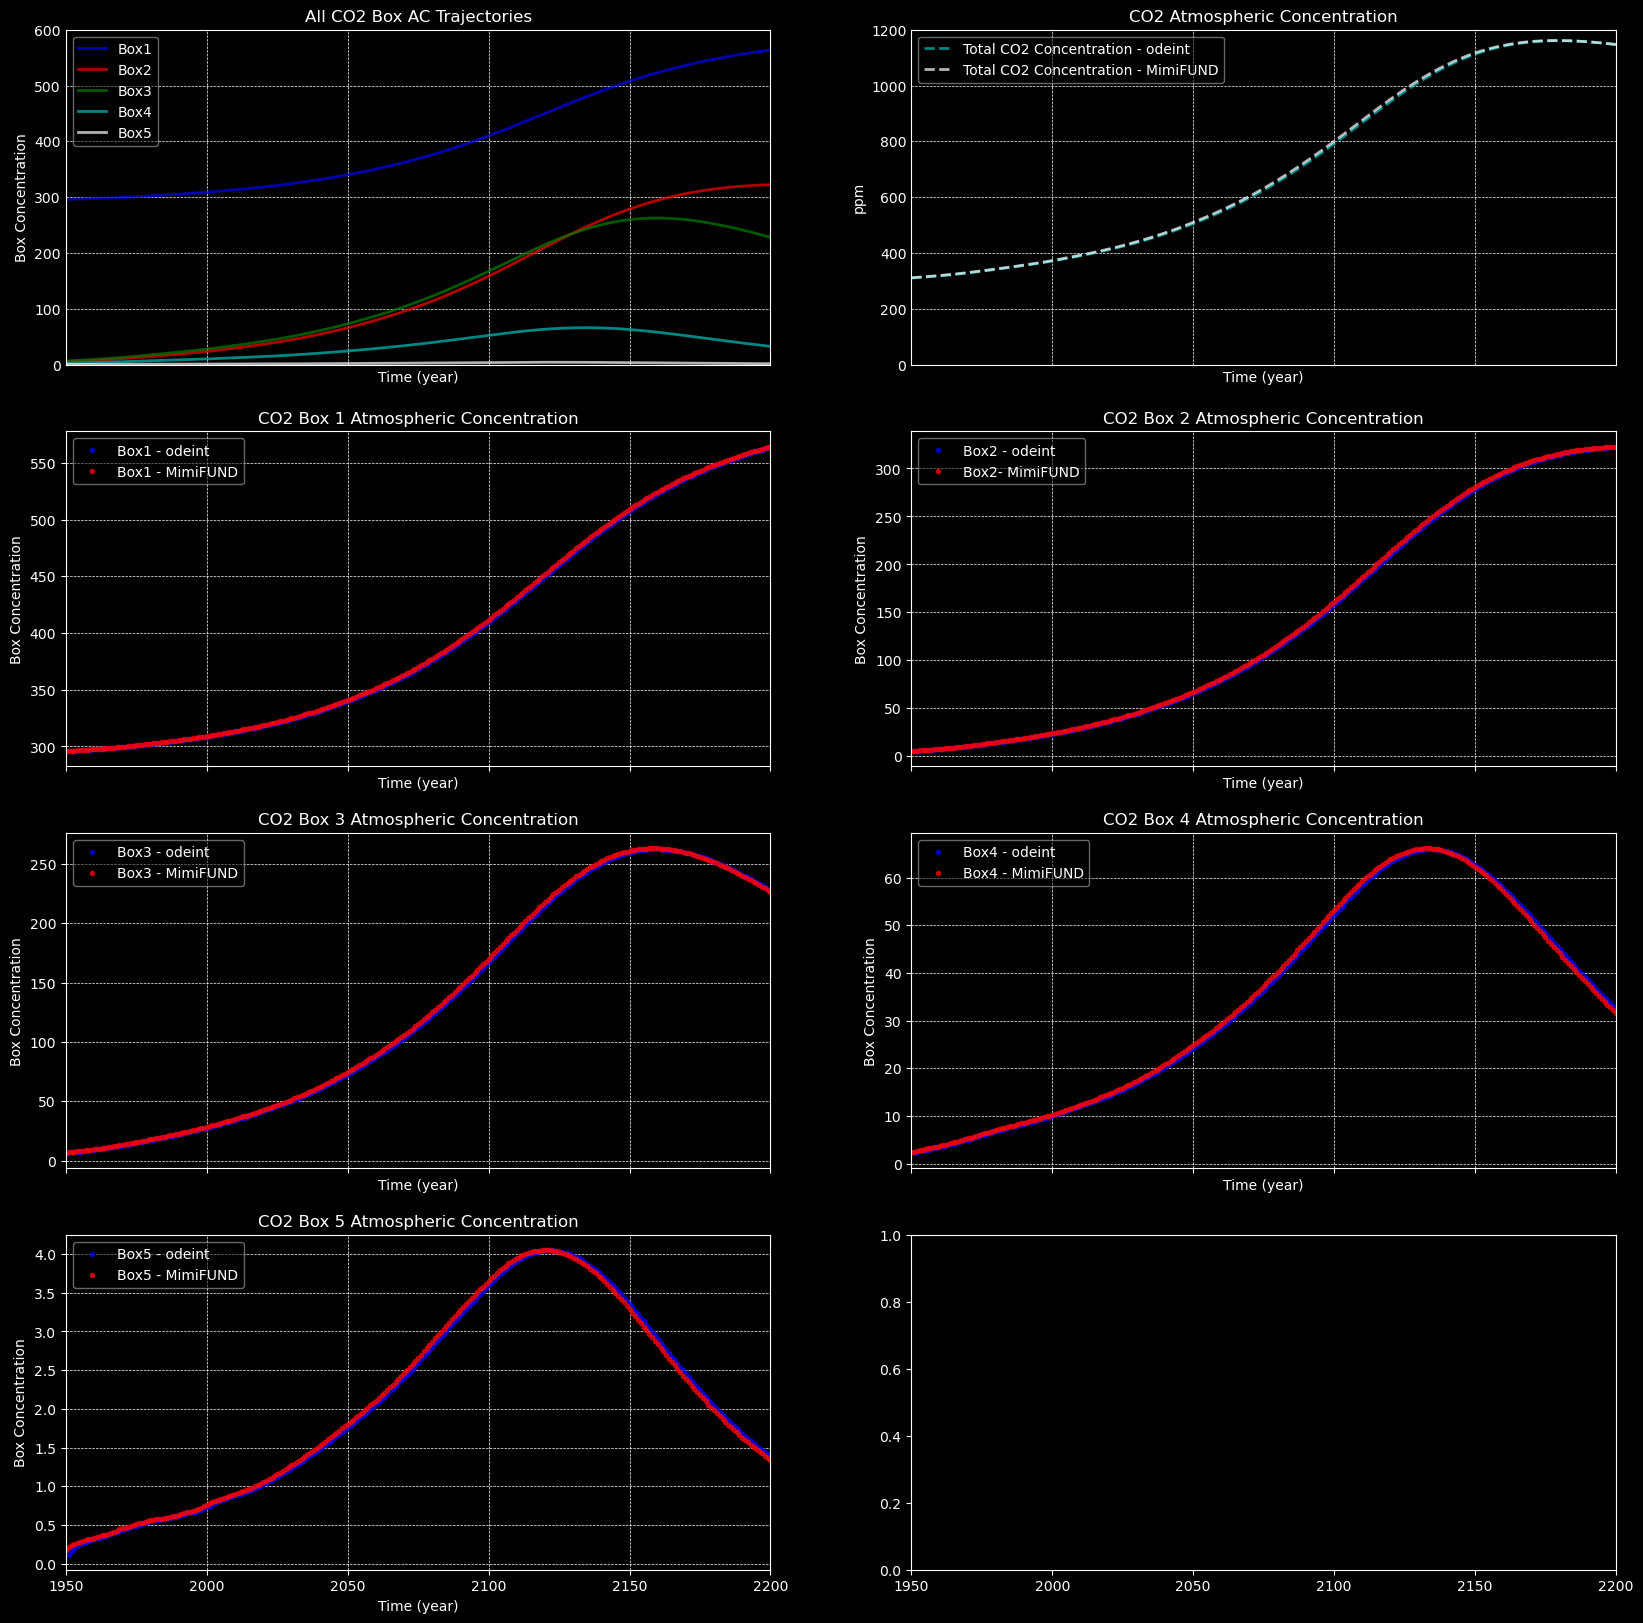

In [10]:
# ICs from the Mimi Explorer window for default run of FUND
Box1_0 = 296.003
Box2_0 = 5.524
Box3_0 = 6.652
Box4_0 = 2.396
Box5_0 = 0.175
atmo_CO2_0 = np.sum([Box1_0, Box2_0, Box3_0, Box4_0, Box5_0])
y0 = Box1_0, Box2_0, Box3_0, Box4_0, Box5_0

# define simulation interval
dt = 1
tstart = 0
tend = 250
t = np.arange(tstart, tend+1, dt) 
t_plot = AC_CH4_vector['time']

sim = odeint(conc_CO2, y0, t)
Box1, Box2, Box3, Box4, Box5 = sim.T

CO2_conc = Box1 + Box2  + Box3  + Box4  + Box5 
# Box1[-1]
plotCO2_conc(t_plot, Box1, Box2, Box3, Box4, Box5, CO2_conc,
             AC_CO2_box1_vector['cbox'], AC_CO2_box2_vector['cbox'], AC_CO2_box3_vector['cbox'],
             AC_CO2_box4_vector['cbox'], AC_CO2_box5_vector['cbox'], AC_CO2_vector['acco2'])


### Plot other GHG Atmospheric Concentrations

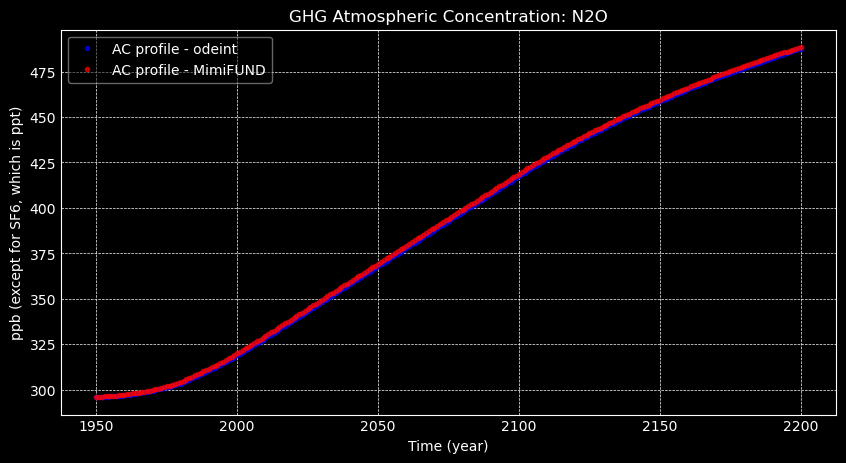

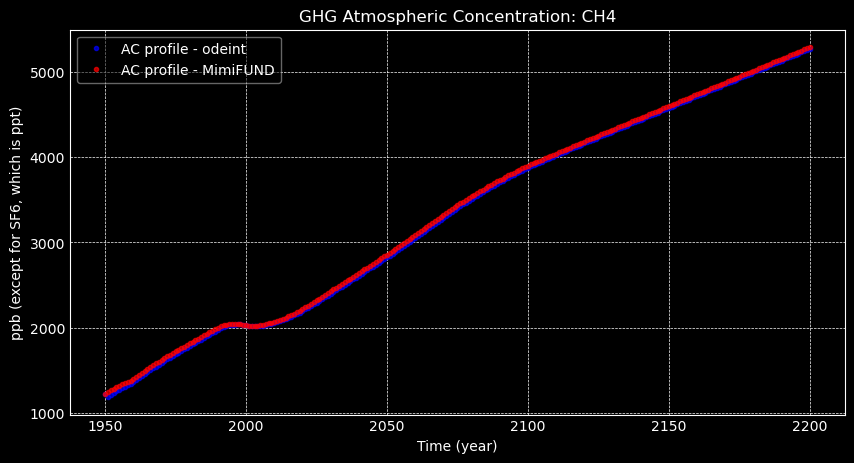

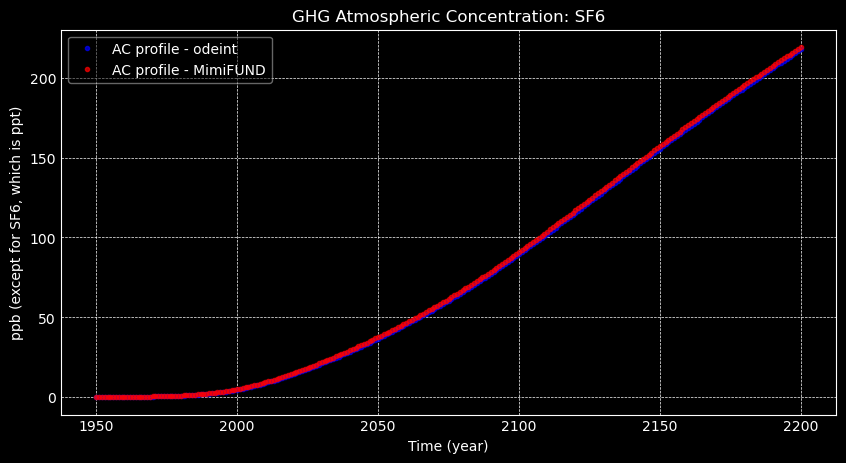

In [11]:
# parameters from Table C of documentation: https://www.fund-model.org/MimiFUND.jl/latest/tables/#Table-C:-Parameters-of-equation-(C.1)-1
# alpha parameters translate emissions (in million metric tonnes), into concentrations (in ppb or ppt by volume)
# beta parameters determine how fact concentrations return to pre-industrial concentration, where we assume the pre-industrial values are equilibrium values. 1/beta is atmospheric life-time (in years) of the gases
alpha_N2O = 0.2079
alpha_CH4 = 0.3597
alpha_SF6 = 0.0398
beta_N20 = 1/114
beta_CH4 = 1/12
beta_SF6 = 1/3200
C_pre_NO2 = 285 #ppb
C_pre_CH4 = 790 #ppb
C_pre_SF6 = 0.04 #ppt; *1000 to convert to ppb

# ICs
C_N2O_0 = 296 #ppb, from code for ClimateN2O component: https://github.com/fund-model/MimiFUND.jl/blob/master/src/components/ClimateN2OCycleComponent.jl
C_CH4_0 = 1222 #ppb, from the Mimi Explorer window for default run of FUND, acch4_0 parameter (initial value for atomospheric concentration of CH4)
C_SF6_0 = 0.04 #ppt, C_pre value, from the code for ClimateSF6 component: https://github.com/fund-model/MimiFUND.jl/blob/master/src/components/ClimateSF6CycleComponent.jl

# define simulation interval
dt = 1
tstart = 0
tend = 250
t = np.arange(tstart, tend+1, dt) 
t_plot = AC_CH4_vector['time'] #np.arange(1950, 1950+250, dt)

sim = odeint(conc_NO2, C_N2O_0, t, args=(alpha_N2O, beta_N20, C_pre_NO2))
N2O_conc = np.squeeze(sim.T)
plot_other_GHG_atmoC(t_plot, N2O_conc, AC_N2O_vector['acn2o'], 'N2O')

sim = odeint(conc_CH4, C_CH4_0, t, args=(alpha_CH4, beta_CH4, C_pre_CH4))
CH4_conc = np.squeeze(sim.T)
plot_other_GHG_atmoC(t_plot, CH4_conc, AC_CH4_vector['acch4'], 'CH4')

sim = odeint(conc_SF6, C_SF6_0, t, args=(alpha_SF6, beta_SF6, C_pre_SF6))
SF6_conc = np.squeeze(sim.T)
plot_other_GHG_atmoC(t_plot, SF6_conc, AC_SF6_vector['acsf6'], 'SF6')
